# Enter Student Name & ID

In [ ]:
student_id =400101689   #@param {type:"integer"}
student_name = "Zahra GhayourHallaj" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101689
your name: Zahra GhayourHallaj


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [ ]:
import numpy as np

In [ ]:
def myPCA(X, num_components):
    # Step 1: Center the data (subtract the mean of each feature from the data)
    X_centered = X - np.mean(X, axis=0)

    # Step 2: Compute the covariance matrix of the centered data
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Perform eigen decomposition on the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort the eigenvalues and eigenvectors in descending order of eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top 'num_components' eigenvectors (principal components)
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Step 6: Transform the data to the new space defined by the selected eigenvectors
    X_pca = np.dot(X_centered, selected_eigenvectors)

    return X_pca

# Example usage:
# X = np.array([[1, 2], [3, 4], [5, 6]])
# num_components = 1
# print(myPCA(X, num_components))


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

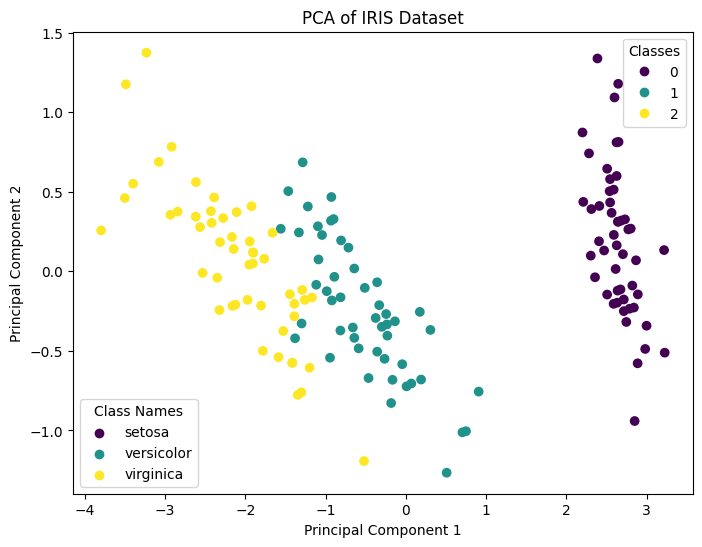

In [ ]:
# myPCA on IRIS
# Load the IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform PCA to reduce to 2D
X_pca = myPCA(X, 2)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')

# Correct the legend creation
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

# Add class labels to the legend
for i, class_name in enumerate(iris.target_names):
    plt.scatter([], [], color=scatter.cmap(scatter.norm(i)), label=class_name)
plt.legend(title="Class Names")

plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.

`Answer 2.1: `
Eigenfaces are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images.

### What are Eigenfaces?

1. **Concept**: Eigenfaces are the principal components of a set of face images. Each face image is treated as a high-dimensional vector (each pixel is a dimension), and eigenfaces are the directions in which the data varies the most.

2. **Creation**:
   - A dataset of face images is gathered and each image is represented as a vector.
   - The mean face is computed and subtracted from each face vector to center the data.
   - The covariance matrix of the centered data is computed.
   - Eigenvalues and eigenvectors of the covariance matrix are calculated.
   - The eigenvectors (principal components) with the largest eigenvalues are chosen. These eigenvectors are reshaped back into the original image shape to form eigenfaces.

3. **Usage**: Eigenfaces form a basis set for face images. Any face image can be approximated as a weighted sum of these eigenfaces. By projecting a face image onto the space spanned by the top eigenfaces, we get a set of coefficients (or weights) that can be used for face recognition tasks.

### Relationship to PCA

1. **Principal Component Analysis (PCA)**:
   - PCA is a statistical technique used to reduce the dimensionality of data while preserving as much variability as possible.
   - It identifies the directions (principal components) along which the variance of the data is maximized.
   - The first principal component accounts for the most variance, the second for the second most, and so on.

2. **Eigenfaces as PCA**:
   - In the context of face recognition, each face image is a high-dimensional vector (with dimensionality equal to the number of pixels).
   - PCA is applied to this set of face vectors to find the principal components, which are the eigenfaces.
   - The top principal components (eigenfaces) capture the most significant features of the face images, reducing the dimensionality of the dataset while retaining important information.

3. **Dimensionality Reduction**:
   - By projecting face images onto the subspace defined by the top eigenfaces, we reduce the dimensionality of the face data.
   - This projection helps in efficiently storing and comparing face images since the dimensionality of the projected data (the coefficients) is much lower than the original image dimensionality.

### Process of Creating Eigenfaces with PCA

1. **Prepare the dataset**: Collect a set of face images, and convert each image into a vector.
2. **Mean centering**: Compute the mean face image and subtract it from each face vector.
3. **Compute covariance matrix**: Calculate the covariance matrix of the centered data.
4. **Eigen decomposition**: Perform eigen decomposition on the covariance matrix to get eigenvalues and eigenvectors.
5. **Select top eigenfaces**: Choose the eigenvectors corresponding to the largest eigenvalues (these are the eigenfaces).
6. **Project images**: Project the original face images onto the eigenface space to get a set of coefficients for each image.

### Example in Face Recognition

1. **Training Phase**:
   - Compute the eigenfaces from a set of training face images.
   - Represent each training face image as a vector of coefficients (weights) in the eigenface space.

2. **Recognition Phase**:
   - For a new face image, project it onto the eigenface space to obtain its coefficients.
   - Compare these coefficients to those of the known faces (e.g., using Euclidean distance) to recognize the face.

### Benefits

- **Efficiency**: Reduces the amount of data required to represent face images.
- **Recognition**: Facilitates efficient and accurate face recognition by focusing on the most significant features.

### Limitations

- **Variability**: May not perform well with significant changes in lighting, facial expressions, or angles.
- **Initial Setup**: Requires a good dataset of face images for training to capture the variability in faces.

In summary, eigenfaces are a direct application of PCA in the domain of face recognition. By using PCA, eigenfaces capture the most significant features of face images, enabling efficient and effective face recognition.

### 2.2 Read the given dataset and create train and test matrices.
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [ ]:
!pip install opencv-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading images from /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/1.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/10.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/2.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/3.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/4.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/5.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/6.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/7.bmp
Loading image: /content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL/s1/8.bmp
Loading image: /content/drive/MyDrive/Colab Notebo

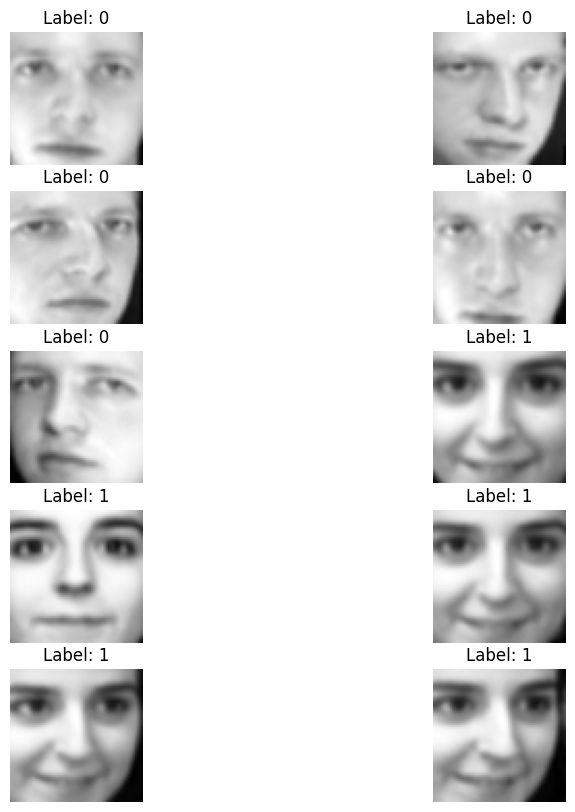

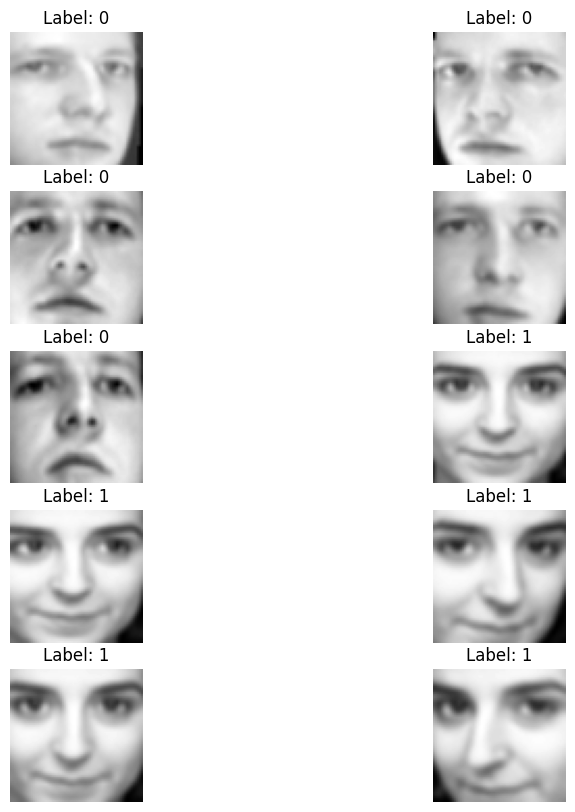

In [ ]:
import os
import cv2
# Define the function to load images from a directory and split into train/test
def load_images_from_directory(directory, image_size=(64, 64)):
    X_train = []
    y_train = []
    X_test = []
    y_test = []

    label = 0

    for person_name in sorted(os.listdir(directory)):
        person_dir = os.path.join(directory, person_name)
        if os.path.isdir(person_dir):
            print(f"Loading images from {person_dir}")
            images = []
            for image_name in sorted(os.listdir(person_dir)):
                image_path = os.path.join(person_dir, image_name)
                print(f"Loading image: {image_path}")
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is None:
                    print(f"Error loading image: {image_path}")
                    continue
                image = cv2.resize(image, image_size)
                images.append(image)

            # Assuming each person has exactly 10 images
            if len(images) == 10:
                # First 5 images for training
                X_train.extend(images[:5])
                y_train.extend([label] * 5)
                # Last 5 images for testing
                X_test.extend(images[5:])
                y_test.extend([label] * 5)
                label += 1
            else:
                print(f"Warning: {person_dir} does not contain exactly 10 images")

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

# Path to the dataset directory in Google Drive
dataset_directory = '/content/drive/MyDrive/Colab Notebooks/Machine learning/ML_CHW4/Q1/ORL'

# Load images and labels
try:
    X_train, X_test, y_train, y_test = load_images_from_directory(dataset_directory)
except Exception as e:
    print(f"Exception occurred while loading images: {e}")

# Print lengths of loaded datasets for debugging
print("Number of training images:", len(X_train))
print("Number of testing images:", len(X_test))
print("Number of training labels:", len(y_train))
print("Number of testing labels:", len(y_test))

# Optionally, visualize some of the images to verify
def visualize_images(images, labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 2, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Visualize some training images
visualize_images(X_train, y_train)

# Visualize some testing images
visualize_images(X_test, y_test)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [ ]:
# Flatten the images (assuming each image is 64x64)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Perform PCA with desired number of components
num_components = 50  # Adjust this number as needed
pca = PCA(n_components=num_components, random_state=42)

# Fit PCA on the training data
pca.fit(X_train_flat)

# Transform both training and testing data
X_train_pca = pca.transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

# Initialize LDA classifier
lda = LDA(solver='eigen',shrinkage='auto')

# Fit LDA on PCA-transformed training data
lda.fit(X_train_pca, y_train)

# Predict labels for test data
y_pred = lda.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of LDA classifier on PCA-transformed data: {accuracy:.2f}')

Accuracy of LDA classifier on PCA-transformed data: 0.91


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
# Iterate over different numbers of PCA components
for num_components in range(100, 39, -1):  # Adjust range and step size as needed
    # Create PCA object
    pca = PCA(n_components=num_components, random_state=42)

    # Fit PCA on the training data
    pca.fit(X_train_flat)

    # Transform both training and testing data
    X_train_pca = pca.transform(X_train_flat)
    X_test_pca = pca.transform(X_test_flat)

    # Apply LDA on the PCA-transformed data
    lda = LDA()
    lda.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = lda.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of LDA classifier on PCA-transformed data with {num_components} components: {accuracy:.2f}')


Accuracy of LDA classifier on PCA-transformed data with 100 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 99 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 98 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 97 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 96 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 95 components: 0.96
Accuracy of LDA classifier on PCA-transformed data with 94 components: 0.95
Accuracy of LDA classifier on PCA-transformed data with 93 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 92 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 91 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 90 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 89 components: 0.94
Accuracy of LDA classifier on PCA-transformed data with 88 components: 0.93
Accuracy of

As you can see in above after 85 components the accuracy of LDA classifier on PCA-transformed data was constant so it is enough